# Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [16]:
dataset = pd.read_csv("../../Data/bank-additional-full.csv", sep=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Cleaning and Preprocessing

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values in the dataset.

In [19]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


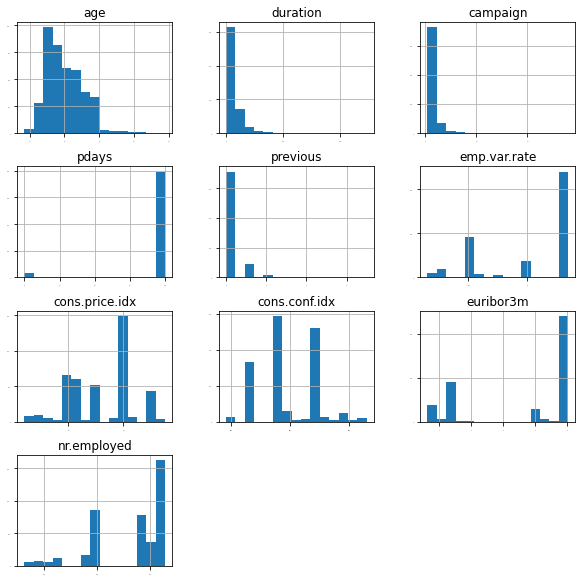

In [20]:
dataset.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

In [21]:
dataset.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
26     0.000024
20     0.000024
25     0.000024
27     0.000024
Name: pdays, dtype: float64

pdays variable has the value 999 96% of the time. The variable gives no information since its variance is very low. It is better to drop this variable.

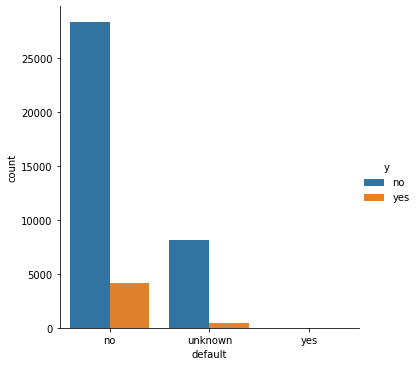

In [22]:
sns.catplot(x='default',hue='y',kind='count',data=dataset)

In [23]:
pd.crosstab(dataset['default'], dataset.y)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


There are only 3 customers which we know for sure that they have a loan in default. Again, this variable gives no information and it will be dropped in a later stage.

In [24]:
dataset.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Looking at the proportion of the classes we like to predict, we see that the dataset is imbalanced. We will take care of this problem with oversampling method.

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

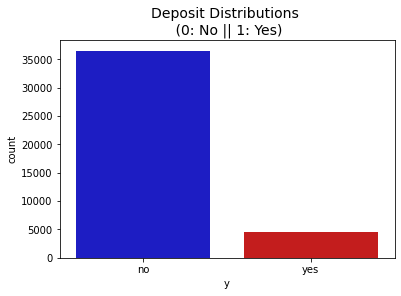

In [25]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=dataset, palette=colors)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)

# Correlation Matrix

<AxesSubplot:>

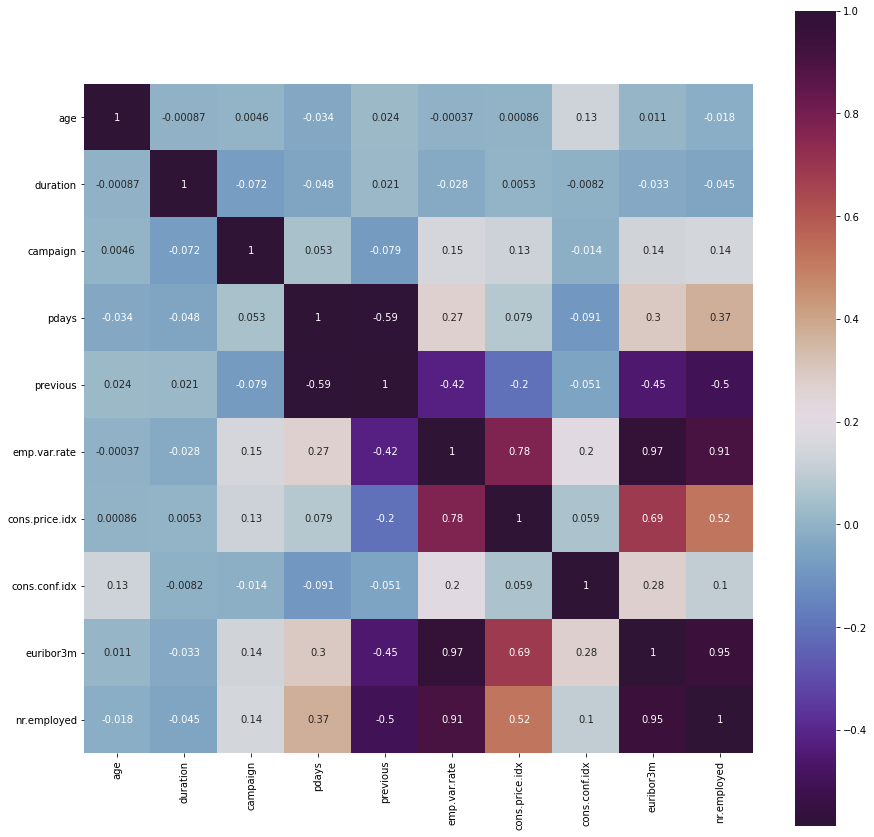

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),square=True,annot=True,cmap= 'twilight_shifted')

There are highly correlated variables in the dataset. It would be reasonable to perform feature selection but most of the algorithms I use have their own feature selection, I omit to ddo that.

## Standardization

In [27]:
# make a copy of dataset to scaling
bank_scale=dataset.copy()

# remove 'pdays' and 'default' columns
bank_scale= bank_scale.drop(['pdays', 'default'], axis=1)

bank_scale.y.replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables 
categorical_cols= ['job','marital', 'education',  'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y','age']
feature_scale=[feature for feature in bank_scale.columns if feature not in categorical_cols]

scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [28]:
scaled_data = pd.concat([bank_scale[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

categorical_cols1= ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,y,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,56,0.010471,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
1,0,57,-0.421501,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
2,0,37,-0.124520,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
3,0,40,-0.413787,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
4,0,56,0.187888,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0


In [29]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] < 25, 'age'] = 0
    dataframe.loc[dataframe['age'] >= 25, 'age'] = 1
           
    return dataframe

age(scaled_data);

In [30]:
scaled_data.head()

,y,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1,0.010471,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
1,0,1,-0.421501,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
2,0,1,-0.124520,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
3,0,1,-0.413787,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0.187888,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,1,0,0,0,1,0


## Train/Test Split

In [15]:
X = scaled_data.iloc[:,1:]
Y = scaled_data.iloc[:,-0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

# Benchmark Models

In [16]:
import warnings
warnings.filterwarnings("ignore")
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train,y_train)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train,y_train)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

# Xgboost Parameters
param_xgb = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6],
 'gamma':[i/10.0 for i in range(0,5)]
}
tuning_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_xgb, scoring='roc_auc',n_jobs=4, cv=5)
tuning_xgb.fit(X_train,y_train)
print('Best Parameter for XGBoost', tuning_xgb.best_params_, tuning_xgb.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


Best Parameter for Random Forest {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45} 0.9449708529066283
Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 2876 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5916 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  4.1min finished


Best Parameter for Tree {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 9} 0.9155417018944977
Best Parameter for XGBoost {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 4} 0.9494231855092734


In [17]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4= KNeighborsClassifier()
clf5= LinearDiscriminantAnalysis()
clf6= XGBClassifier()

# Instantiate the classfiers and make a list
classifiers = [LinearDiscriminantAnalysis(),
               KNeighborsClassifier(),
               GaussianNB(), 
               SVC(kernel='linear'),
               DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=9,min_samples_leaf=2, random_state=12),
               RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3),  ('knn', clf4),('lda', clf5), ('xgb', clf6)], voting ='soft')]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy= accuracy_score(y_train, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train,  y_train_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

CPU times: user 3min 41s, sys: 773 ms, total: 3min 42s
Wall time: 3min 19s


In [18]:
result_table.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table

,fpr1,tpr1,fpr,tpr,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall,confusion matrix,Report
classifiers,,,,,,,,,,,,,
LinearDiscriminantAnalysis,"[0.0, 0.03889943074003795, 1.0]","[0.0, 0.515055921995985, 1.0]","[0.0, 0.03805774278215223, 1.0]","[0.0, 0.49262792714657416, 1.0]",0.910751,0.909391,0.738078,0.727285,0.549058,0.620087,0.492628,"[[8796, 348], [585, 568]]","{'0': {'precision': 0.9376399104573073, 'recal..."
KNeighborsClassifier,"[0.0, 0.023281272806889505, 1.0]","[0.0, 0.5615141955835962, 1.0]","[0.0, 0.03827646544181977, 1.0]","[0.0, 0.4319167389418907, 1.0]",0.929850,0.902399,0.769116,0.696820,0.497751,0.587264,0.431917,"[[8794, 350], [655, 498]]","{'0': {'precision': 0.9306804952905069, 'recal..."
GaussianNB,"[0.0, 0.08104656254561378, 1.0]","[0.0, 0.490966446802409, 1.0]","[0.0, 0.07863079615048119, 1.0]","[0.0, 0.4934952298352125, 1.0]",0.870642,0.873458,0.704960,0.707432,0.466202,0.441770,0.493495,"[[8425, 719], [584, 569]]","{'0': {'precision': 0.9351759351759352, 'recal..."
SVC,"[0.0, 0.021164793460808642, 1.0]","[0.0, 0.3234872383137367, 1.0]","[0.0, 0.01837270341207349, 1.0]","[0.0, 0.32003469210754554, 1.0]",0.904859,0.907546,0.651161,0.650831,0.436686,0.687151,0.320035,"[[8976, 168], [784, 369]]","{'0': {'precision': 0.919672131147541, 'recall..."
DecisionTreeClassifier,"[0.0, 0.03185666326083783, 1.0]","[0.0, 0.5517636937195297, 1.0]","[0.0, 0.03543307086614173, 1.0]","[0.0, 0.5099739809193409, 1.0]",0.921142,0.913664,0.759954,0.737270,0.569492,0.644737,0.509974,"[[8820, 324], [565, 588]]","{'0': {'precision': 0.9397975492807672, 'recal..."
RandomForestClassifier,"[0.0, 0.005437162458035323, 1.0]","[0.0, 0.7811872669916834, 1.0]","[0.0, 0.02941819772528434, 1.0]","[0.0, 0.4787510841283608, 1.0]",0.970477,0.915509,0.887875,0.724666,0.559271,0.672351,0.478751,"[[8875, 269], [601, 552]]","{'0': {'precision': 0.9365766146053187, 'recal..."
XGBClassifier,"[0.0, 0.027514231499051234, 1.0]","[0.0, 0.6142816174361916, 1.0]","[0.0, 0.03466754155730534, 1.0]","[0.0, 0.5255854293148309, 1.0]",0.932051,0.916092,0.793384,0.745459,0.583815,0.656555,0.525585,"[[8827, 317], [547, 606]]","{'0': {'precision': 0.9416471090249626, 'recal..."
Model Ensemble,"[0.0, 0.008283462268282003, 1.0]","[0.0, 0.758244909664468, 1.0]","[0.0, 0.03521434820647419, 1.0]","[0.0, 0.5186470078057241, 1.0]",0.965362,0.914830,0.874981,0.741716,0.576942,0.650000,0.518647,"[[8822, 322], [555, 598]]","{'0': {'precision': 0.9408126266396503, 'recal..."


In [19]:
pd.DataFrame(result_table.iloc[0,12]).transpose()

,precision,recall,f1-score,support
0,0.937640,0.961942,0.949636,9144.000000
1,0.620087,0.492628,0.549058,1153.000000
accuracy,0.909391,0.909391,0.909391,0.909391
macro avg,0.778864,0.727285,0.749347,10297.000000
weighted avg,0.902082,0.909391,0.904781,10297.000000


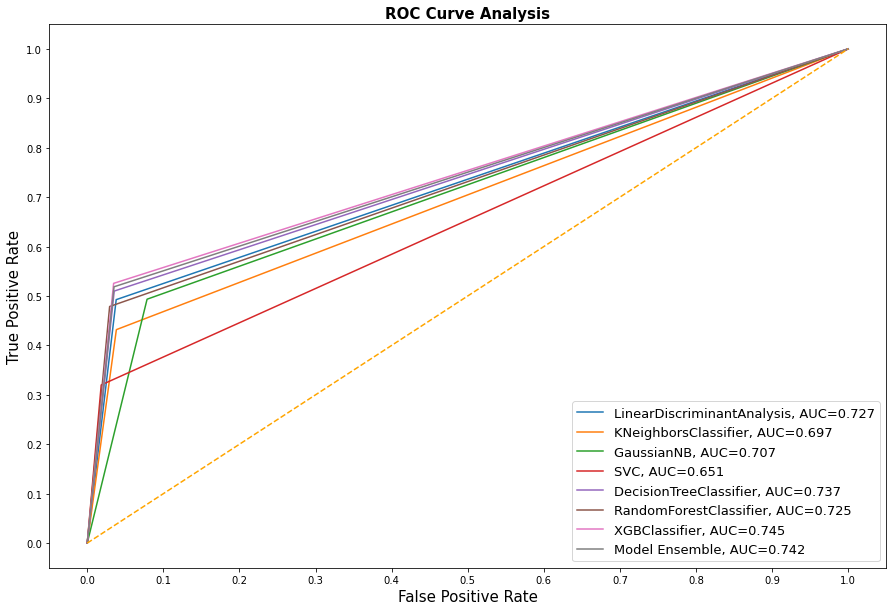

In [20]:
fig = plt.figure(figsize=(15,10))

for i in range(result_table.shape[0]):
    plt.plot(result_table.iloc[i,]['fpr'], 
             result_table.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

# Oversampling - RandomOverSampler

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') 
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 

Before OverSampling, counts of label '1': 3487
Before OverSampling, counts of label '0': 27404 

After OverSampling, the shape of X_train: (54808, 50)
After OverSampling, the shape of y_train: (54808,) 

After OverSampling, counts of label '1': 27404
After OverSampling, counts of label '0': 27404


In [22]:
# Tuning parameter for RF 
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train_over,y_train_over)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train_over,y_train_over)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

# Xgboost Parameters
param_xgb = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6],
 'gamma':[i/10.0 for i in range(0,5)]}
tuning_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_xgb, scoring='roc_auc',n_jobs=4, cv=5)
tuning_xgb.fit(X_train_over,y_train_over)
print('Best Parameter for XGBoost', tuning_xgb.best_params_, tuning_xgb.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


Best Parameter for Random Forest {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45} 0.9994475207066834
Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 1374 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2882 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3596 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4896 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6220 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  7.6min finished


Best Parameter for Tree {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4} 0.9052327516290516
Best Parameter for XGBoost {'gamma': 0.1, 'max_depth': 6, 'min_child_weight': 4} 0.9652200622413071


In [23]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()
clf5= LinearDiscriminantAnalysis()
clf6= XGBClassifier()

# Instantiate the classfiers and make a list
classifiers = [LinearDiscriminantAnalysis(),
               KNeighborsClassifier(),
               GaussianNB(), 
               SVC(kernel='linear'),
               DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=5,min_samples_leaf=1, random_state=12),
               RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=45, min_samples_split=5, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=4, min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3), ('knn', clf4), ('lda', clf5), ('xgb', clf6)], voting ='soft')]

# Define a result table as a DataFrame
result_table1 = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    y_train_pred = model.predict(X_train_over)
    y_test_pred = model.predict(X_test)
    
    train_accuracy= accuracy_score(y_train_over, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train_over,  y_train_pred)
    
    train_auc = roc_auc_score(y_train_over, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)

CPU times: user 8min 50s, sys: 724 ms, total: 8min 51s
Wall time: 8min 16s


In [24]:
result_table1.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table1

,fpr1,tpr1,fpr,tpr,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall,confusion matrix,Report
classifiers,,,,,,,,,,,,,
LinearDiscriminantAnalysis,"[0.0, 0.13184206685155453, 1.0]","[0.0, 0.8346956648664429, 1.0]","[0.0, 0.12828083989501313, 1.0]","[0.0, 0.8386816999132697, 1.0]",0.851427,0.868020,0.851427,0.855200,0.587306,0.451869,0.838682,"[[7971, 1173], [186, 967]]","{'0': {'precision': 0.9771974990805443, 'recal..."
KNeighborsClassifier,"[0.0, 0.10319661363304627, 1.0]","[0.0, 0.9995256166982922, 1.0]","[0.0, 0.1306867891513561, 1.0]","[0.0, 0.753686036426713, 1.0]",0.948165,0.856366,0.948165,0.811500,0.540255,0.421027,0.753686,"[[7949, 1195], [284, 869]]","{'0': {'precision': 0.9655046763026843, 'recal..."
GaussianNB,"[0.0, 0.09505911545759743, 1.0]","[0.0, 0.5297766749379652, 1.0]","[0.0, 0.09230096237970253, 1.0]","[0.0, 0.5403295750216826, 1.0]",0.717359,0.866563,0.717359,0.724014,0.475573,0.424676,0.540330,"[[8300, 844], [530, 623]]","{'0': {'precision': 0.9399773499433749, 'recal..."
SVC,"[0.0, 0.1607429572325208, 1.0]","[0.0, 0.9104875200700627, 1.0]","[0.0, 0.1568241469816273, 1.0]","[0.0, 0.9132697311361665, 1.0]",0.874872,0.851025,0.874872,0.878223,0.578571,0.423402,0.913270,"[[7710, 1434], [100, 1053]]","{'0': {'precision': 0.9871959026888605, 'recal..."
DecisionTreeClassifier,"[0.0, 0.12928769522697417, 1.0]","[0.0, 0.9493139687636841, 1.0]","[0.0, 0.13790463692038496, 1.0]","[0.0, 0.8699045967042498, 1.0]",0.910013,0.862970,0.910013,0.866000,0.587065,0.443021,0.869905,"[[7883, 1261], [150, 1003]]","{'0': {'precision': 0.9813270260176771, 'recal..."
RandomForestClassifier,"[0.0, 0.0002554371624580353, 1.0]","[0.0, 1.0, 1.0]","[0.0, 0.05511811023622047, 1.0]","[0.0, 0.6053772766695577, 1.0]",0.999872,0.906866,0.999872,0.775130,0.592781,0.580699,0.605377,"[[8640, 504], [455, 698]]","{'0': {'precision': 0.9499725123694338, 'recal..."
XGBClassifier,"[0.0, 0.14008903809662823, 1.0]","[0.0, 0.9573419938695081, 1.0]","[0.0, 0.1441382327209099, 1.0]","[0.0, 0.9262792714657415, 1.0]",0.908626,0.863747,0.908626,0.891071,0.603560,0.447611,0.926279,"[[7826, 1318], [85, 1068]]","{'0': {'precision': 0.9892554670711667, 'recal..."
Model Ensemble,"[0.0, 0.033863669537293827, 1.0]","[0.0, 0.999744562837542, 1.0]","[0.0, 0.07611548556430446, 1.0]","[0.0, 0.7094535993061578, 1.0]",0.982940,0.899874,0.982940,0.816669,0.613423,0.540291,0.709454,"[[8448, 696], [335, 818]]","{'0': {'precision': 0.9618581350335876, 'recal..."


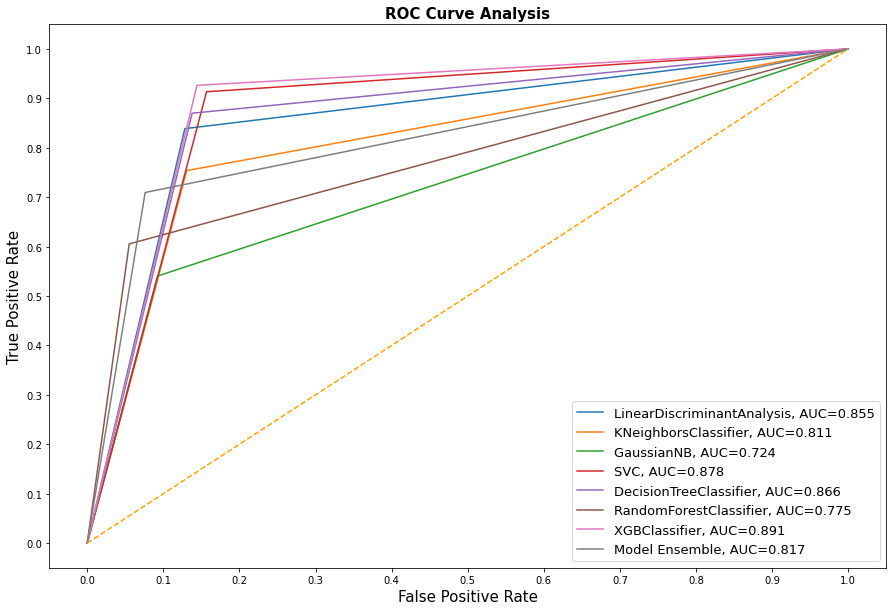

In [25]:
fig = plt.figure(figsize=(15,10))

for i in range(result_table1.shape[0]):
    plt.plot(result_table1.iloc[i,]['fpr'], 
             result_table1.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table1.index[i], result_table1.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

# Results

In [26]:
# Baseline Model
result_table.iloc[:,[4,5,6,7,8,9,10]]

,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall
classifiers,,,,,,,
LinearDiscriminantAnalysis,0.910751,0.909391,0.738078,0.727285,0.549058,0.620087,0.492628
KNeighborsClassifier,0.929850,0.902399,0.769116,0.696820,0.497751,0.587264,0.431917
GaussianNB,0.870642,0.873458,0.704960,0.707432,0.466202,0.441770,0.493495
SVC,0.904859,0.907546,0.651161,0.650831,0.436686,0.687151,0.320035
DecisionTreeClassifier,0.921142,0.913664,0.759954,0.737270,0.569492,0.644737,0.509974
RandomForestClassifier,0.970477,0.915509,0.887875,0.724666,0.559271,0.672351,0.478751
XGBClassifier,0.932051,0.916092,0.793384,0.745459,0.583815,0.656555,0.525585
Model Ensemble,0.965362,0.914830,0.874981,0.741716,0.576942,0.650000,0.518647


In [27]:
# Oversampling with RandomOverSampler
result_table1.iloc[:,[4,5,6,7,8,9,10]]

,train_accuracy,test_accuracy,train_auc,test_auc,f1_score,precision,recall
classifiers,,,,,,,
LinearDiscriminantAnalysis,0.851427,0.868020,0.851427,0.855200,0.587306,0.451869,0.838682
KNeighborsClassifier,0.948165,0.856366,0.948165,0.811500,0.540255,0.421027,0.753686
GaussianNB,0.717359,0.866563,0.717359,0.724014,0.475573,0.424676,0.540330
SVC,0.874872,0.851025,0.874872,0.878223,0.578571,0.423402,0.913270
DecisionTreeClassifier,0.910013,0.862970,0.910013,0.866000,0.587065,0.443021,0.869905
RandomForestClassifier,0.999872,0.906866,0.999872,0.775130,0.592781,0.580699,0.605377
XGBClassifier,0.908626,0.863747,0.908626,0.891071,0.603560,0.447611,0.926279
Model Ensemble,0.982940,0.899874,0.982940,0.816669,0.613423,0.540291,0.709454


# Feature Importance and SHAP Values

In [28]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=4, min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27)
model_xgb = xgb.fit(X_train_over, y_train_over)
y_train_xgb = model_xgb.predict(X_train_over)
y_test_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test,y_test_xgb))
print(classification_report(y_test,y_test_xgb, digits=3))

print('Train accuracy: %0.3f' % accuracy_score(y_train_over, y_train_xgb))
print('Test accuracy: %0.3f' % accuracy_score(y_test, y_test_xgb))

print('Train AUC: %0.3f' % roc_auc_score(y_train_over, y_train_xgb))
print('Test AUC: %0.3f' % roc_auc_score(y_test, y_test_xgb))

[[7826 1318]
 [  85 1068]]
              precision    recall  f1-score   support

           0      0.989     0.856     0.918      9144
           1      0.448     0.926     0.604      1153

    accuracy                          0.864     10297
   macro avg      0.718     0.891     0.761     10297
weighted avg      0.929     0.864     0.883     10297

Train accuracy: 0.909
Test accuracy: 0.864
Train AUC: 0.909
Test AUC: 0.891


In [29]:
import shap
expl_xgb = shap.TreeExplainer(model_xgb)
shap_xgb = expl_xgb.shap_values(X_train_over)

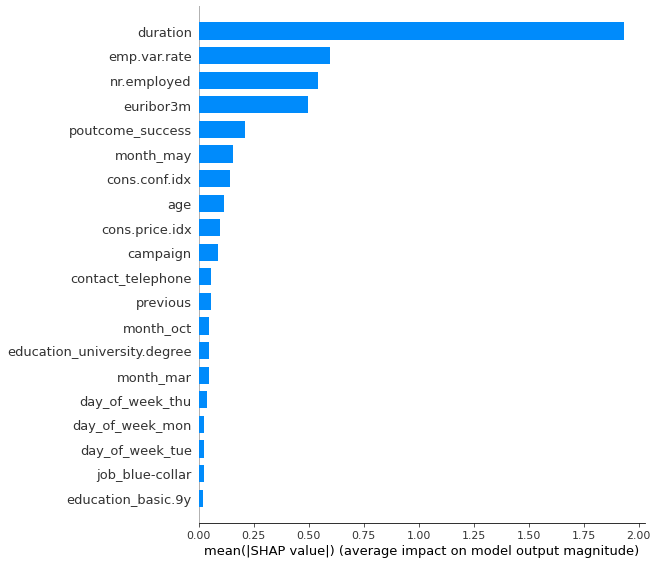

In [30]:
shap.summary_plot(shap_xgb, X_train_over, plot_type="bar")

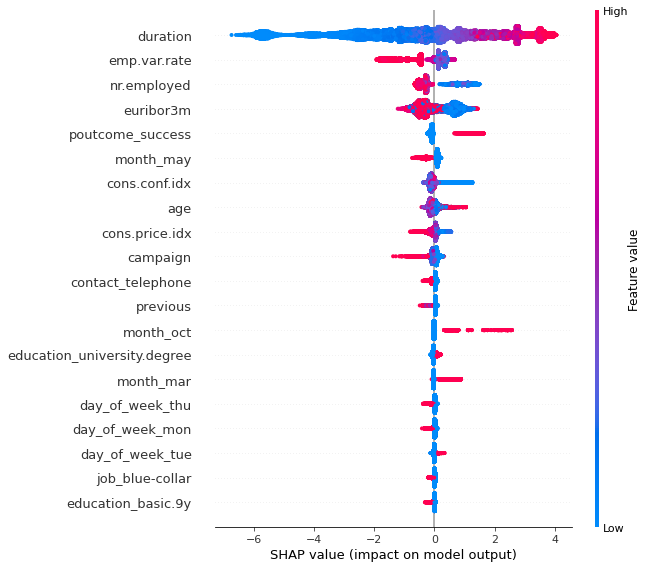

In [31]:
shap.summary_plot(shap_xgb, X_train_over)

In [32]:
shap.initjs()
shap.force_plot(expl_xgb.expected_value, shap_xgb[1050,:], X_train_over.iloc[1050,:], link='logit')

In [33]:
shap.initjs()
shap.force_plot(expl_xgb.expected_value, shap_xgb[4000,:], X_train_over.iloc[4000,:], link='logit')

In [34]:
# base value
y_train_over.mean()

0.5

In [35]:
X_train_over.iloc[4000,]

age                             -0.865939
duration                         4.843157
campaign                        -0.565922
previous                         1.671136
emp.var.rate                    -1.197935
cons.price.idx                  -1.179380
cons.conf.idx                   -1.231034
euribor3m                       -1.338939
nr.employed                     -0.940281
job_blue-collar                  0.000000
job_entrepreneur                 0.000000
job_housemaid                    0.000000
job_management                   0.000000
job_retired                      0.000000
job_self-employed                0.000000
job_services                     0.000000
job_student                      0.000000
job_technician                   1.000000
job_unemployed                   0.000000
job_unknown                      0.000000
marital_married                  0.000000
marital_single                   1.000000
marital_unknown                  0.000000
education_basic.6y               0

## Fairness

In [32]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [33]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [34]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [35]:
scaled_data

,y,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1,0.010471,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,0,0,0,1,0,0,0,1,0
1,0,1,-0.421501,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,0,0,0,1,0,0,0,1,0
2,0,1,-0.124520,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,0,0,0,1,0,0,0,1,0
3,0,1,-0.413787,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0.187888,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,1,0.292025,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,1,0,0,0,0,0,0,1,0
41184,0,1,0.481012,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,1,0,0,0,0,0,0,1,0
41185,0,1,-0.267225,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,1,0,0,0,0,0,0,1,0
41186,1,1,0.708569,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,1,0,0,0,0,0,0,1,0


In [36]:
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(scaled_data,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

In [37]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.130428


In [40]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

clf1 = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=9,min_samples_leaf=2, random_state=12)
clf2 = RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=27)
clf3 = GaussianNB()
clf4= KNeighborsClassifier()
clf5= LinearDiscriminantAnalysis()
clf6= XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3),  ('knn', clf4),('lda', clf5), ('xgb', clf6)]


votingC = VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3),  ('knn', clf4),('lda', clf5), ('xgb', clf6)], voting ='soft')

model = votingC.fit(X_train, y_train)


mdl = model.fit(X_train, y_train)
with open('../../Results/VotingClassifier/' + nb_fname + '.pkl', 'wb') as f:
    pickle.dump(mdl, f)

with open('../../Results/VotingClassifier/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/VotingClassifier/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [45]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
list_estimators = []
f1= []

for name, ml_model in estimators:
    
    list_estimators.append((name,ml_model))
    #print(list_estimators)
    model = VotingClassifier(estimators=list_estimators, voting='hard')
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)        
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [46]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(len(list_estimators) - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/VotingClassifier/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5
accuracy,0.917294,0.918265,0.916970,0.917537,0.914866,0.915594,0.917294
f1,0.555652,0.590762,0.532361,0.578054,0.521383,0.568830,0.555652
statistical_parity_difference,0.137181,0.139264,0.113906,0.162916,0.139239,0.159376,0.137181
equal_opportunity_difference,0.141857,0.115563,0.126566,0.125102,0.164033,0.147321,0.141857
average_abs_odds_difference,0.104738,0.092104,0.087041,0.112393,0.117502,0.118709,0.104738
disparate_impact,1.064769,0.964832,1.020192,1.103744,1.156716,1.085715,1.064769
theil_index,0.069765,0.064240,0.073020,0.066287,0.074431,0.067553,0.069765
